In [103]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv('/content/tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#Data Preprocessing

In [105]:
data.shape

(244, 7)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [107]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [108]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [109]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


There are no null values in the dataset.

#Visualization


In [110]:
import matplotlib.pyplot as plt

In [111]:
data['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Text(0.5, 1.0, 'Bar graph of day')

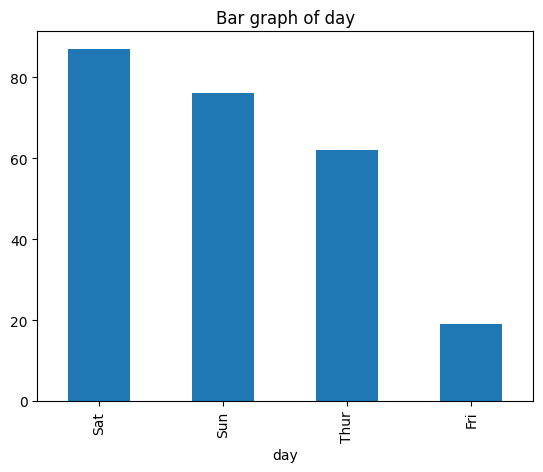

In [112]:
data['day'].value_counts().plot(kind='bar')
plt.title('Bar graph of day')

From the above graph we can see that more number of customers visited on saturdays.

In [113]:
data.groupby('day')[['total_bill','tip']].mean()

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


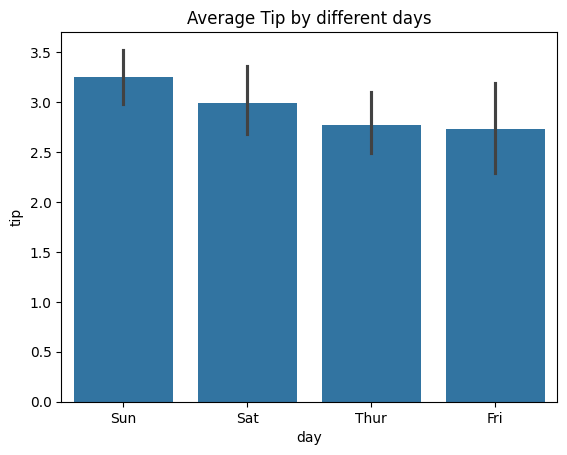

In [117]:
sns.barplot(x="day", y="tip", data=data, estimator=np.mean)
plt.title("Average Tip by different days")
plt.show()

On sundays average tip amount for the restaurant is more compared to remaining days because average bill amount is high on sundays.

<Axes: xlabel='time'>

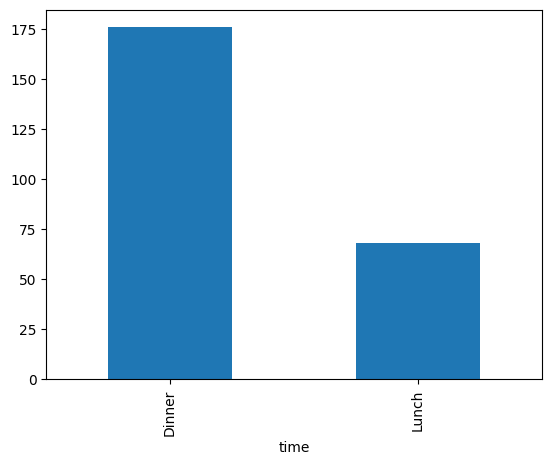

In [47]:
data['time'].value_counts().plot(kind='bar')

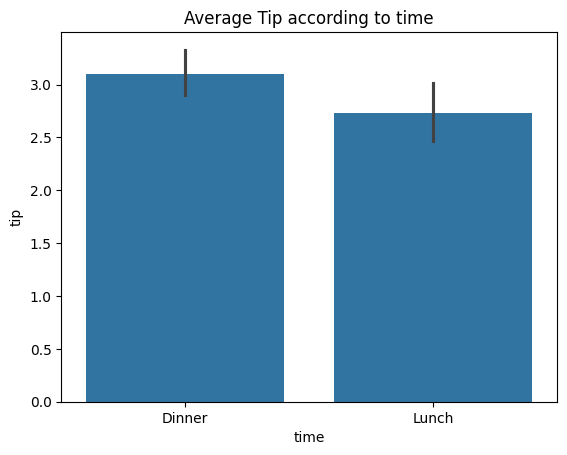

In [118]:
sns.barplot(x="time", y="tip", data=data, estimator=np.mean)
plt.title("Average Tip according to time")
plt.show()

In [53]:
data.groupby('time')[['total_bill','tip','size']].sum()

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


We can see that tip amount collected by the restaurant is more at dinner time compared to lunch time since no of people visiting the restaurant at dinner time is quite larger than lunch and amount payed by them is more at dinner time.



<Axes: xlabel='sex'>

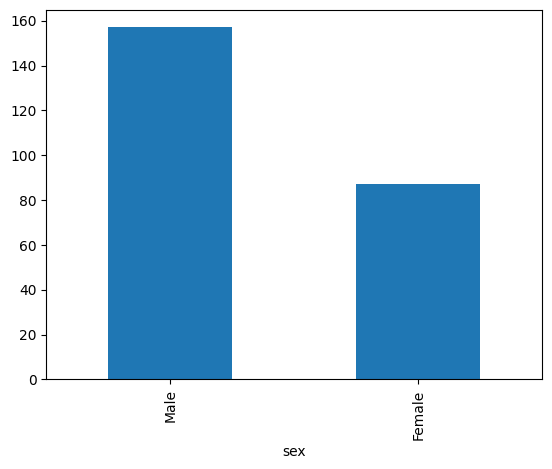

In [6]:
data['sex'].value_counts().plot(kind='bar')

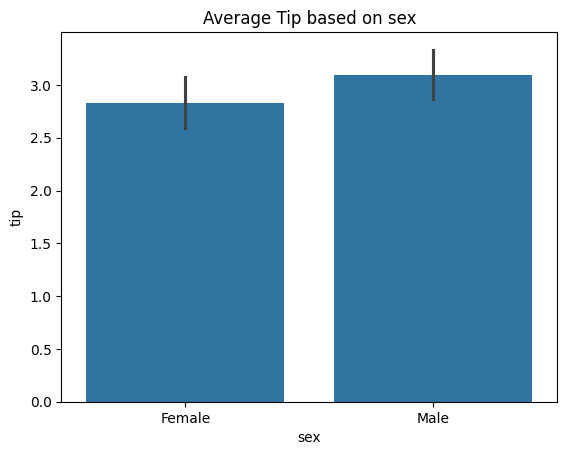

In [120]:
sns.barplot(x="sex", y="tip", data=data, estimator=np.mean)
plt.title("Average Tip based on sex")
plt.show()

In [57]:
data.groupby('sex')[['total_bill','size','tip']].mean()

,total_bill,size,tip
sex,,,
Female,18.056897,2.459770,2.833448
Male,20.744076,2.630573,3.089618


Males are contributing more for tip.

<Axes: xlabel='smoker'>

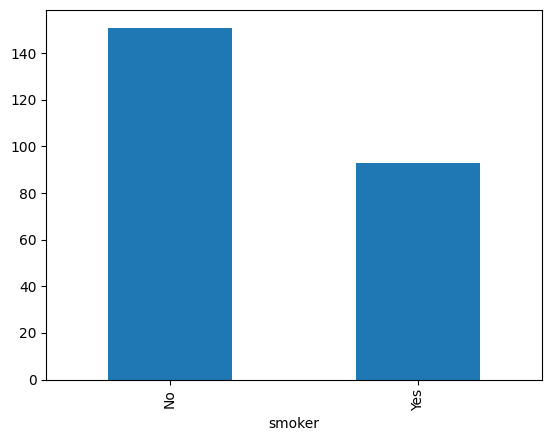

In [7]:
data['smoker'].value_counts().plot(kind='bar')

In [59]:
data.groupby('smoker')[['total_bill','size','tip']].mean()

,total_bill,size,tip
smoker,,,
No,19.188278,2.668874,2.991854
Yes,20.756344,2.408602,3.008710


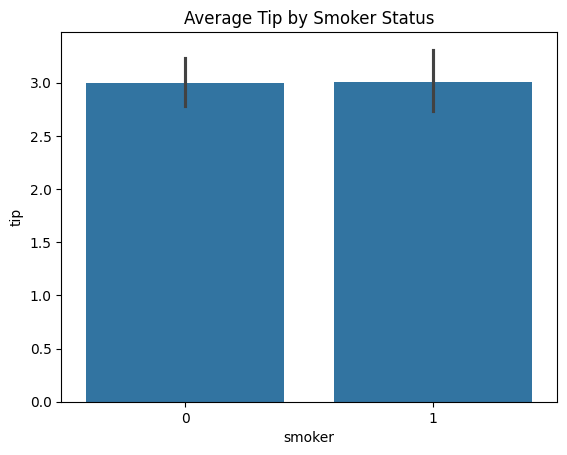

In [99]:
sns.barplot(x="smoker", y="tip", data=data, estimator=np.mean)
plt.title("Average Tip by Smoker Status")
plt.show()

<Axes: xlabel='size'>

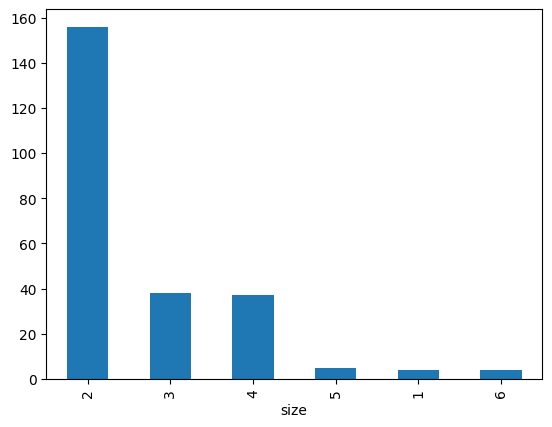

In [8]:
data['size'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Distribution of size')

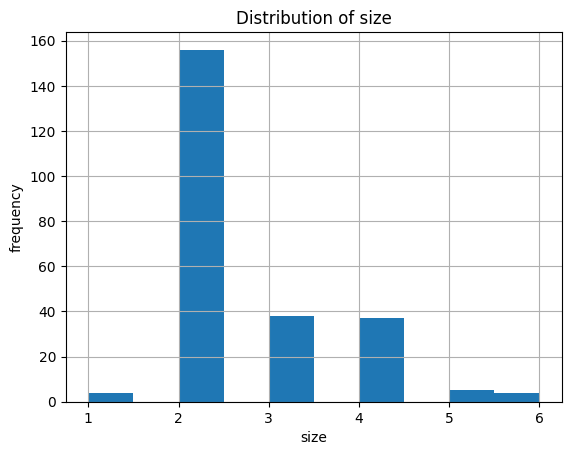

In [9]:
data['size'].hist()
plt.xlabel('size')
plt.ylabel('frequency')
plt.title('Distribution of size')

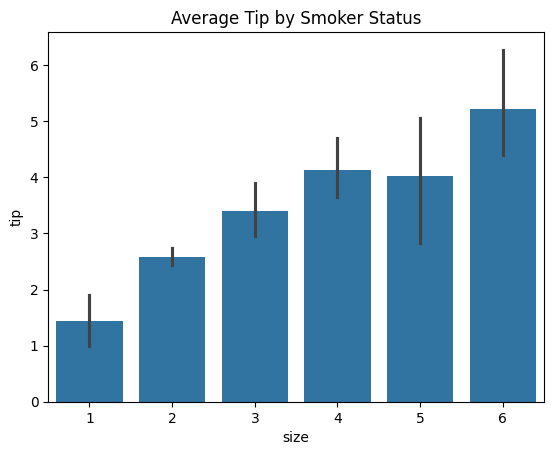

In [121]:
sns.barplot(x="size", y="tip", data=data, estimator=np.mean)
plt.title("Average Tip by size ")
plt.show()

Frequency of size 2 is more in number but tip average is more for size 6.

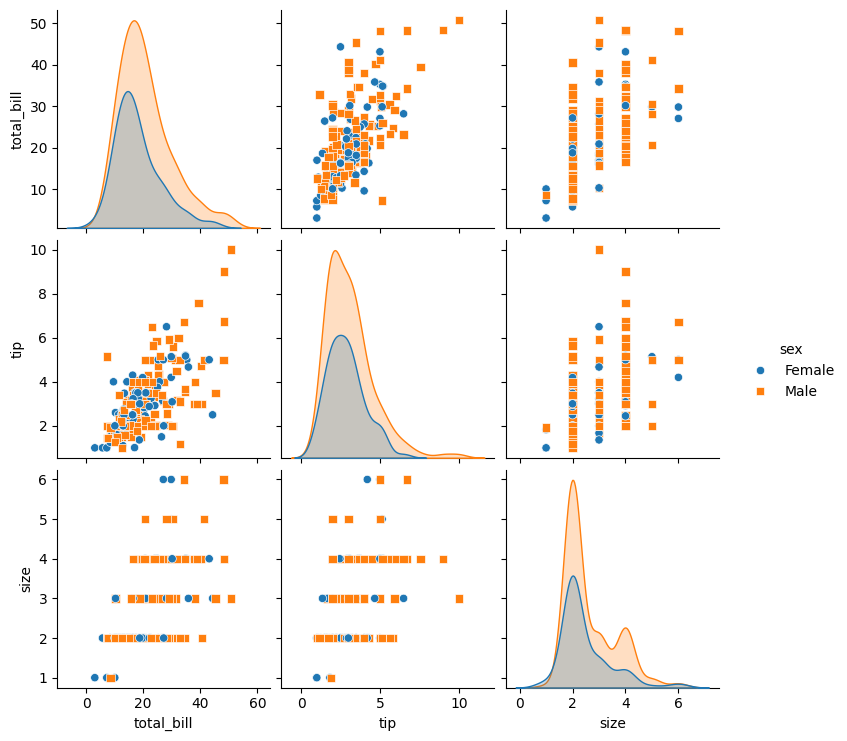

In [60]:
sns.pairplot(data, hue="sex", diag_kind="kde", markers=["o", "s"])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

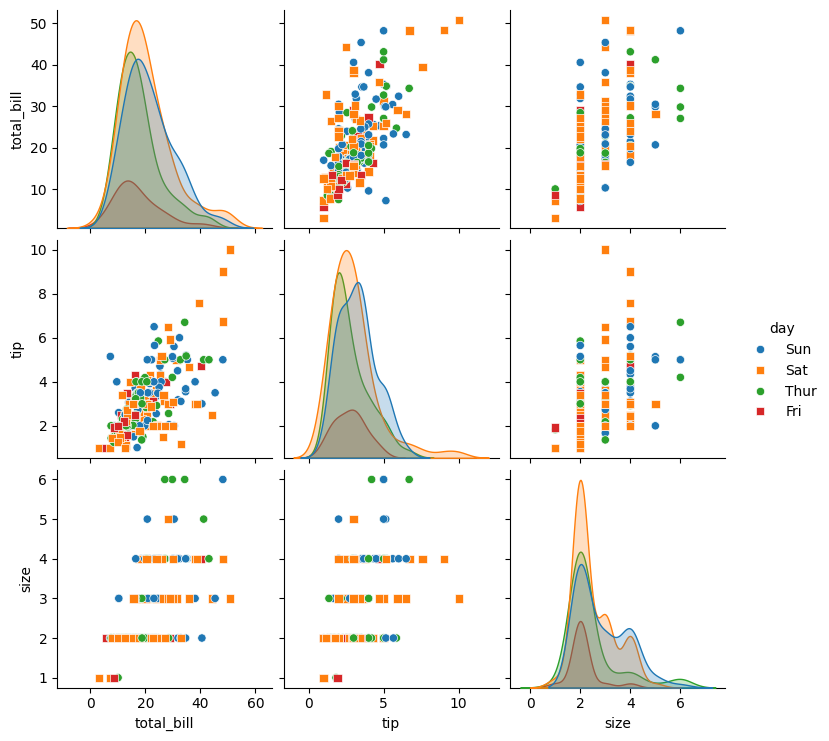

In [61]:
sns.pairplot(data, hue="day", diag_kind="kde", markers=["o", "s"])
plt.show()

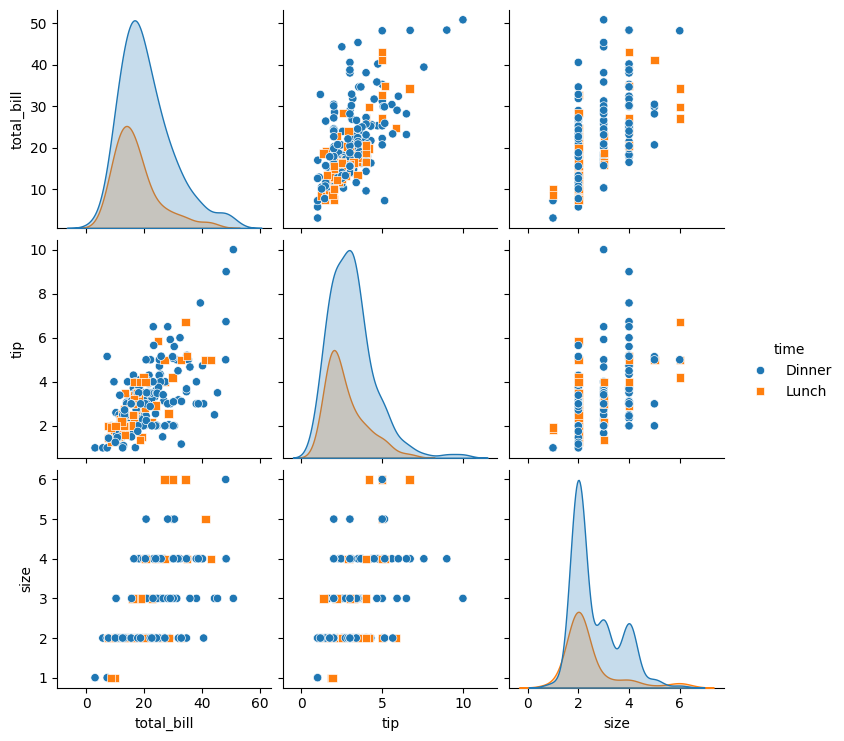

In [62]:
sns.pairplot(data, hue="time", diag_kind="kde", markers=["o", "s"])
plt.show()

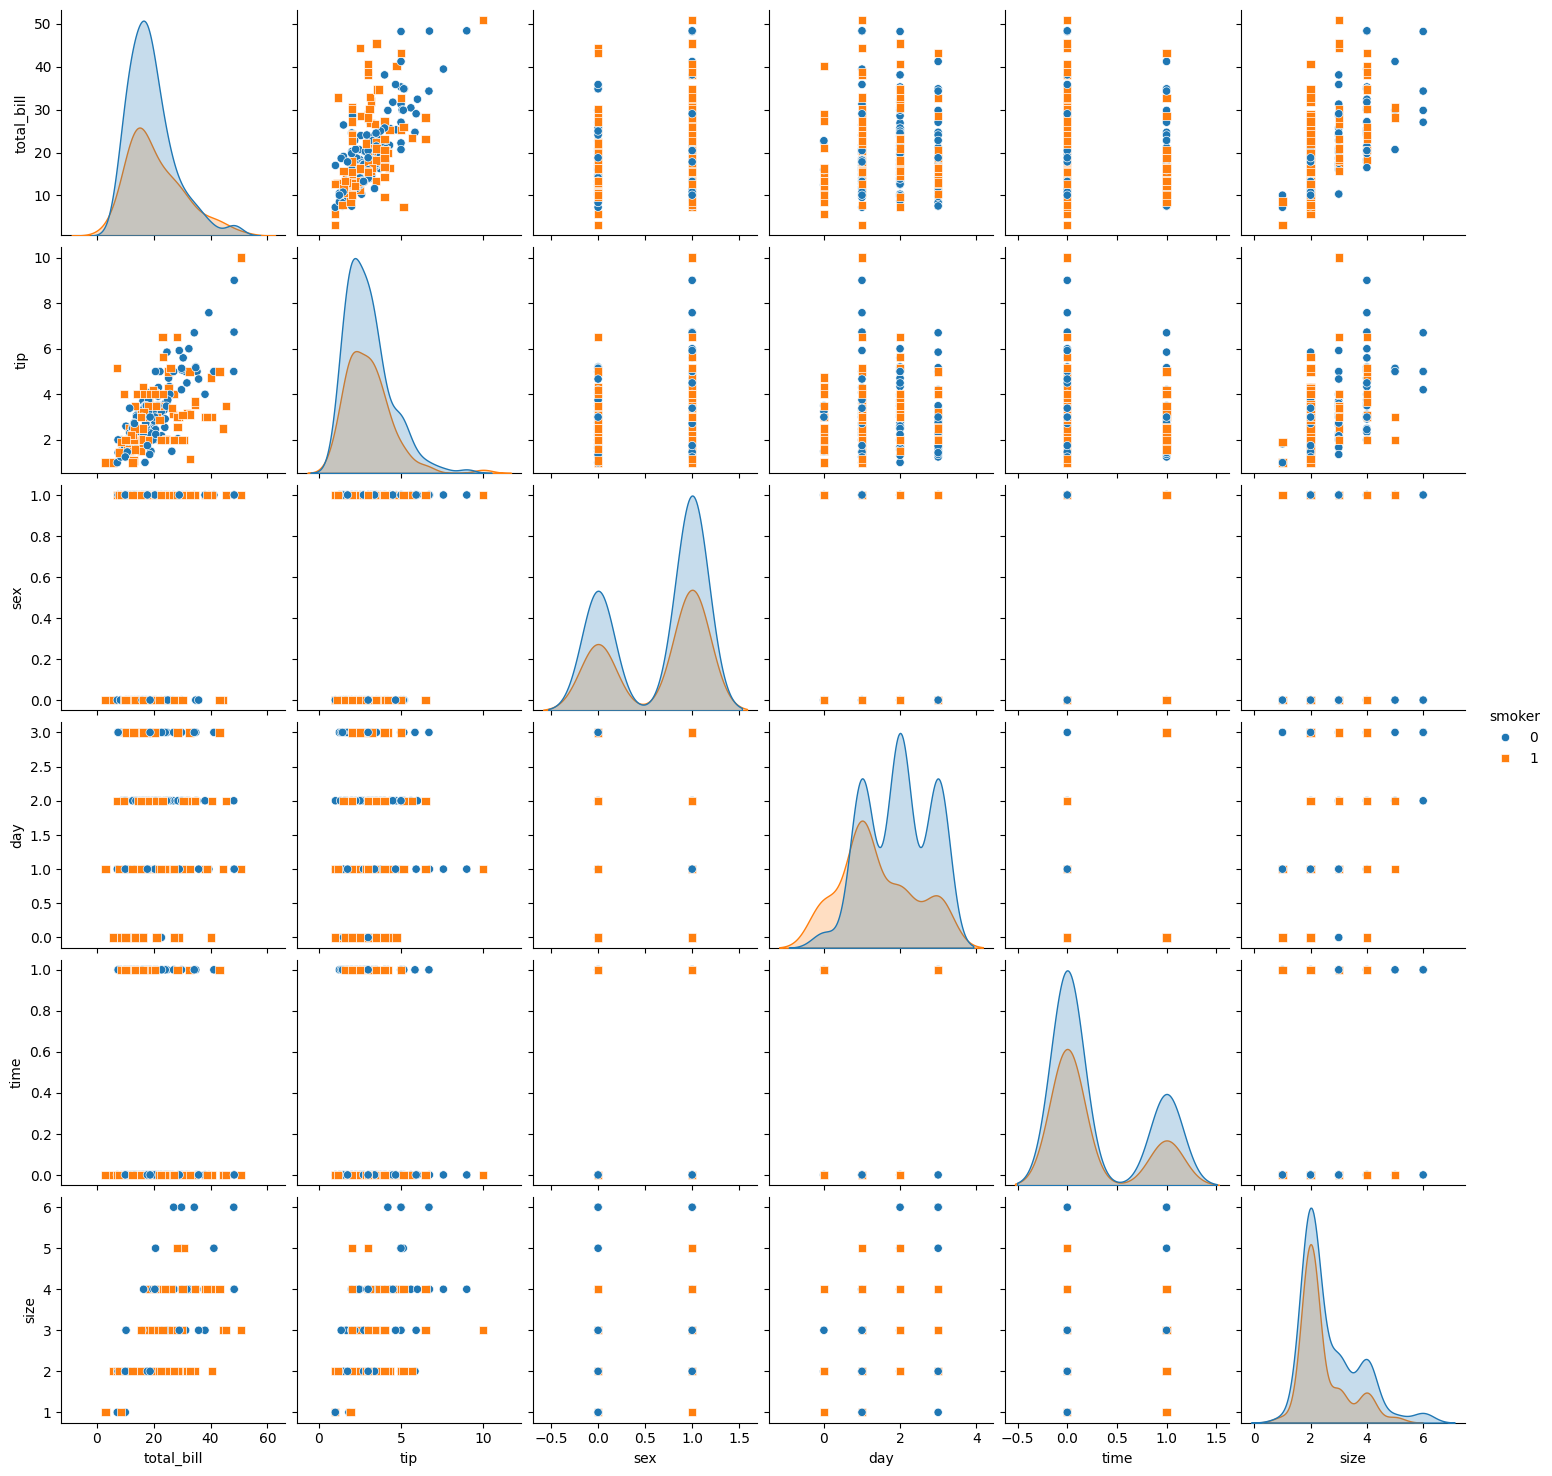

In [101]:
sns.pairplot(data, hue="smoker", diag_kind="kde", markers=["o", "s"])
plt.show()

#Data Preparation

In [64]:
numerical = []
categorical = []
for col in data.columns:
  if data[col].nunique()>3:
    numerical.append(col)
  else:
    categorical.append(col)

In [65]:
numerical

['total_bill', 'tip', 'day', 'size']

In [66]:
categorical

['sex', 'smoker', 'time']

In [123]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [124]:
x = data.drop('tip', axis=1)
y = data['tip']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


#Linear Regression

In [80]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(x_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.4441368826121932


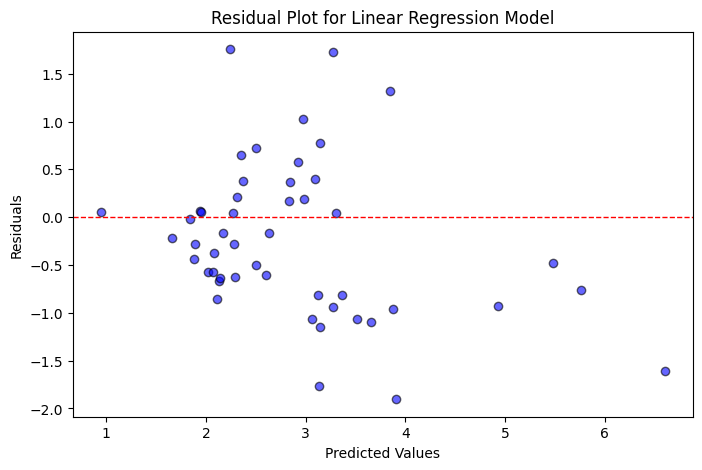

In [81]:
residuals = y_test - y_pred_linear
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_linear, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression Model")
plt.show()


# Ridge Regression

In [82]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(x_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.44415383440667655


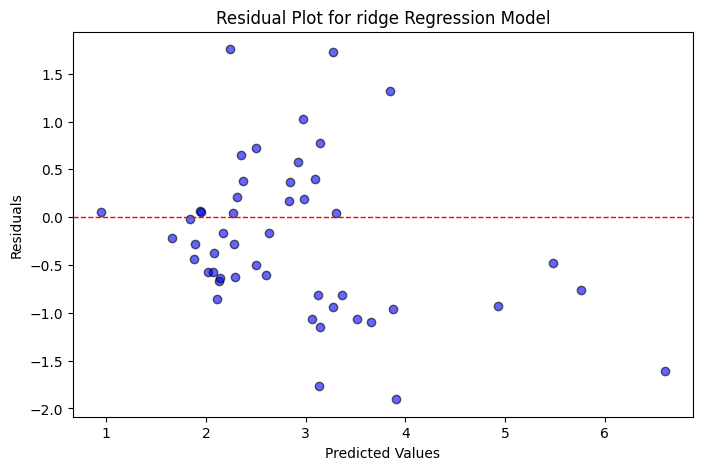

In [83]:
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_ridge, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for ridge Regression Model")
plt.show()


# Lasso Regression

In [84]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(x_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



Lasso Regression R2: 0.5467115210170849


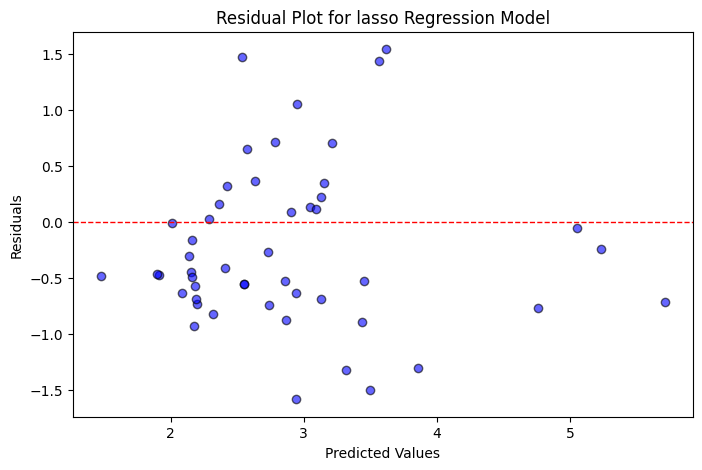

In [85]:
residuals = y_test - y_pred_lasso
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_lasso, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for lasso Regression Model")
plt.show()


# Decision Tree Regressor

In [86]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(x_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: -0.06402275877244601


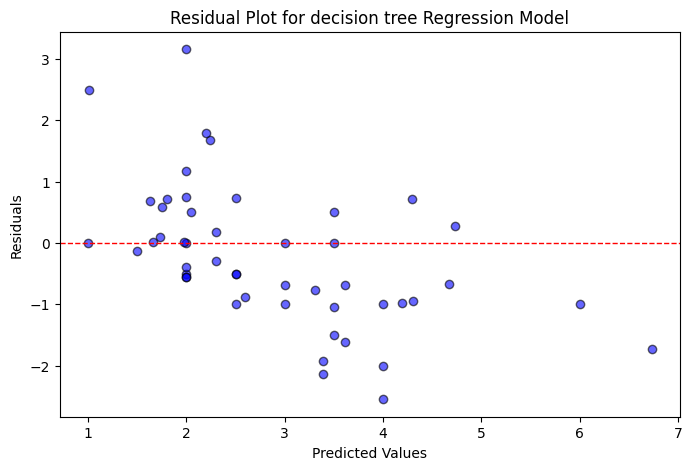

In [87]:
residuals = y_test - y_pred_tree
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_tree, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for decision tree Regression Model")
plt.show()


# Random Forest Regressor

In [88]:
forest_reg = RandomForestRegressor(n_estimators=50, random_state=0)
forest_reg.fit(x_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(x_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.25342250684497125


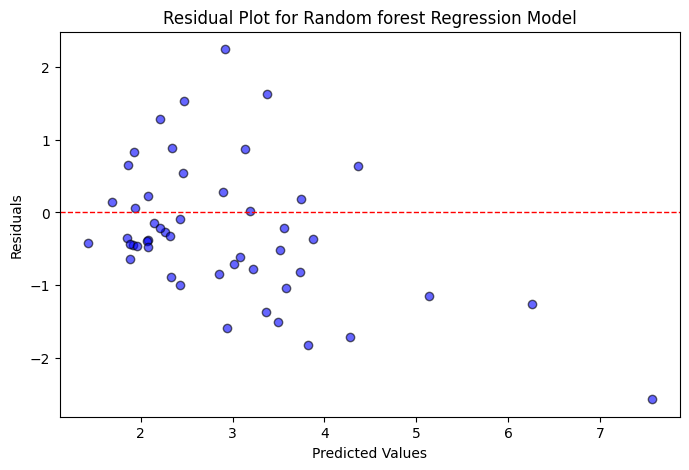

In [89]:
residuals = y_test - y_pred_forest
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_forest, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random forest Regression Model")
plt.show()


# SVM

In [90]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)
x_test_scaled = sc_X.transform(x_test)
y_train_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_scaled, y_train_scaled)

y_pred_svr = svr_reg.predict(x_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale


print('SVR R2:', r2_score(y_test, y_pred_svr))



SVR R2: 0.44183596997405983


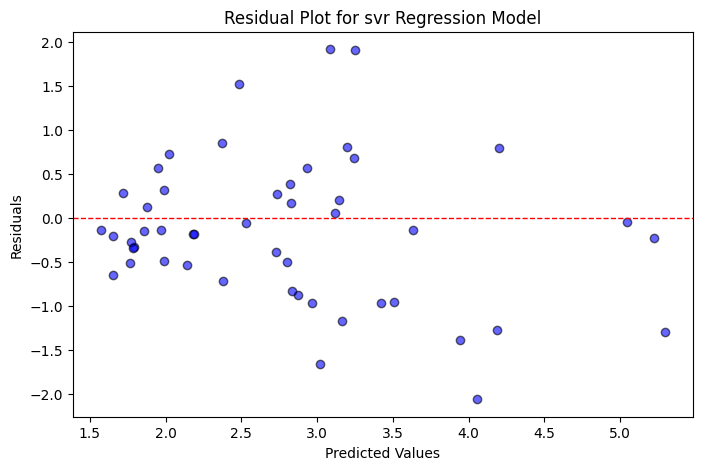

In [91]:
residuals = y_test - y_pred_svr
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_svr, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for svr Regression Model")
plt.show()


# KNN

In [92]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)

y_pred_knn = knn_reg.predict(x_test)

print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression R2: 0.3294034029001649


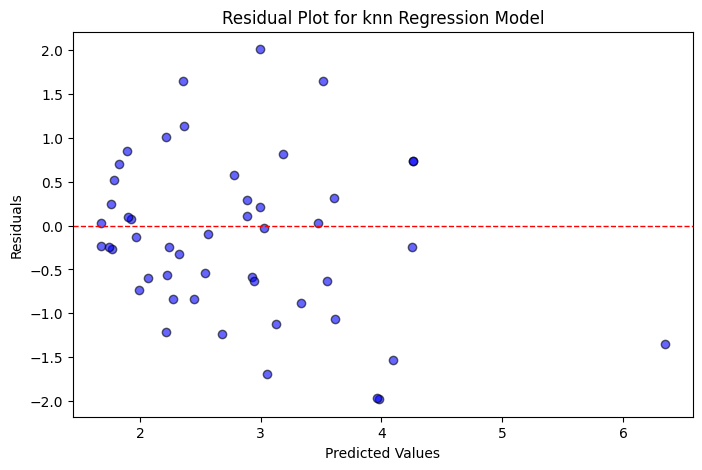

In [93]:
residuals = y_test - y_pred_knn
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_knn, residuals, color="blue", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for knn Regression Model")
plt.show()


#Correlation Matrix

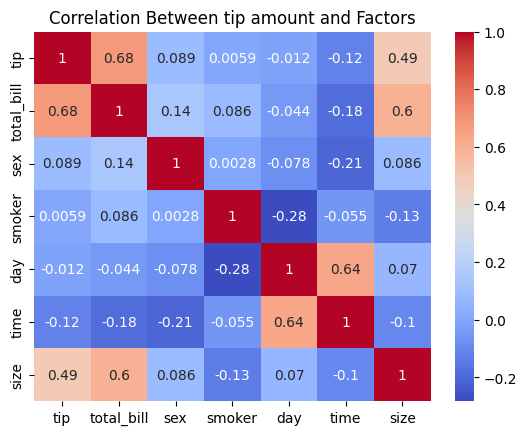

In [126]:
correlation_matrix = data[['tip','total_bill','sex','smoker','day','time','size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between tip amount and Factors")
plt.show()


we can see that a moderate positive correlation between tip and total_bill (0.68), suggesting that higher bills tend to correspond with higher tips.There is also a moderate positive correlation between tip and size (0.49), indicating that larger group sizes may lead to higher tips.

#Statistical Tests for Linearity

In [32]:
import statsmodels.api as sm
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Perform the Rainbow Test
rainbow_test = sm.stats.linear_rainbow(model)
print("Rainbow test statistic:", rainbow_test[0])
print("p-value:", rainbow_test[1])

if rainbow_test[1] < 0.05:
    print("Reject null hypothesis - The model may be non-linear.")
else:
    print("Fail to reject null hypothesis - The model appears to be linear.")

Rainbow test statistic: 1.2036274510126597
p-value: 0.15798464222013167
Fail to reject null hypothesis - The model appears to be linear.


It appears that a linear model is an appropriate fit for the data.

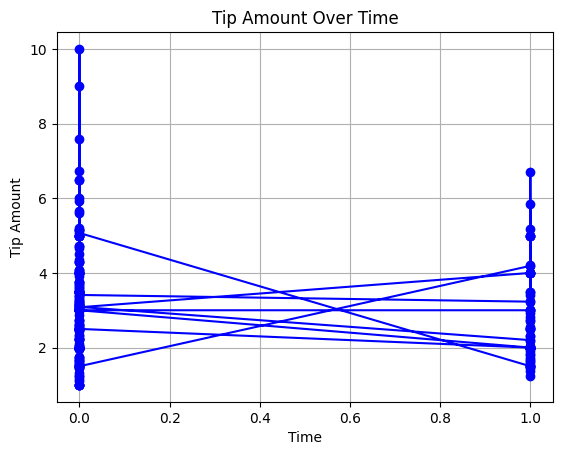

In [127]:
plt.plot(data['time'], data['tip'], marker='o', color='b', linestyle='-')
plt.title("Tip Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Tip Amount")
plt.grid(True)
plt.show()

The tip amounts don't show any clear trend or pattern over time, likely because the data isn't structured with a continuous time element.